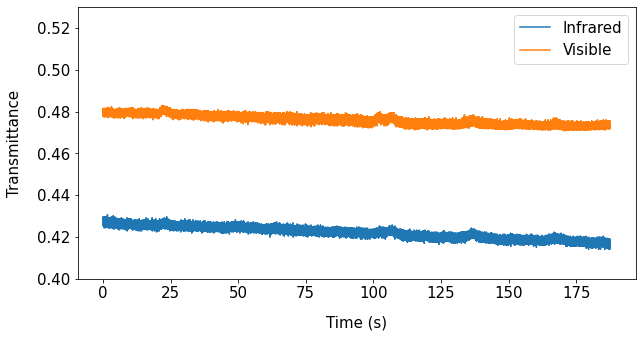

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import os

fs = 409.6   #10sで4096ポイント記録

# ファイルを開く
with open('20230717_mouse_test_raw.txt', 'r') as file:
    # ファイルの内容を読み込む
    lines = file.readlines()

# 数値データを格納するリストを初期化
visible_values = []
infrared_values = []

# ファイルの内容を数値データとして解析
for line in lines:
    # テキストファイルの各行をスペースやカンマなどで区切って数値データを取得
    data = line.strip().split()
    # xとyの値をリストに追加
    visible_values.append(float(data[0]))
    infrared_values.append(float(data[1]))

data_len = len(visible_values)
time = data_len/fs             #記録ポイントを秒に変換
x = np.arange(0, time, 1/fs)

plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.plot(x, infrared_values, label='Infrared')
plt.plot(x, visible_values, label='Visible')
#plt.xlim(0, 10)



plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('Transmittance', labelpad=15)
plt.ylim(0.40, 0.53)
plt.legend(loc='upper right')


# plt.show()



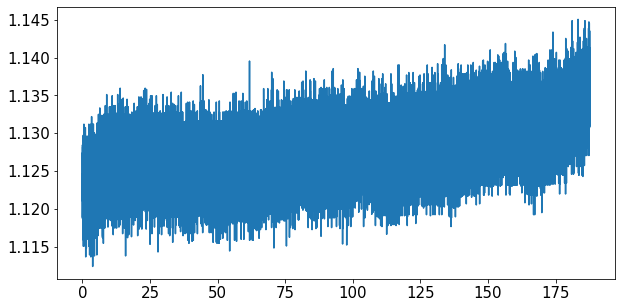

In [21]:
R_IR = []

for i in range(len(visible_values)):
    R_IR.append(visible_values[i]/infrared_values[i])

plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.plot(x, R_IR)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import os

fs = 409.6   #10sで4096ポイント記録

# ファイルを開く
with open('20230717_mouse_test2.txt', 'r') as file:
    # ファイルの内容を読み込む
    lines = file.readlines()

# 数値データを格納するリストを初期化
Clock_values = []
heatbeat_values = []
SD_values = []
SN_values = []
R_values = []
SpO2_values = []

# ファイルの内容を数値データとして解析
for line in lines:
    # テキストファイルの各行をスペースやカンマなどで区切って数値データを取得
    data = line.strip().split()
    # xとyの値をリストに追加
    Clock_values.append(float(data[0]))
    heatbeat_values.append(float(data[1]))
    SD_values.append(float(data[2]))
    SN_values.append(float(data[3]))
    R_values.append(float(data[4]))
    SpO2_values.append(float(data[5]))

Clock_values = [X*(1/fs) for X in Clock_values]   #1clock=1/fs (0.00244140625s)なのでこれを掛ける


Text(0, 0.5, 'SN ratio (dB)')

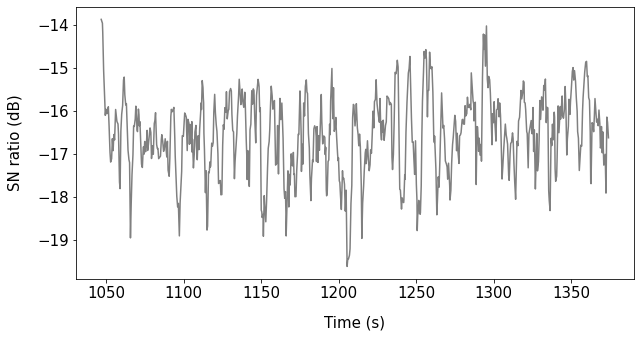

In [71]:
plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.plot(Clock_values, SN_values, color='gray')
plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('SN ratio (dB)', labelpad=15)

Text(0, 0.5, 'R_value')

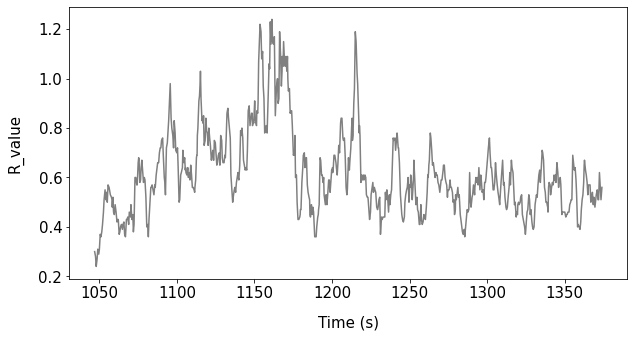

In [73]:
plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.plot(Clock_values, R_values, color='gray')
plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('R_value', labelpad=15)

Text(0, 0.5, 'SpO2 (%)')

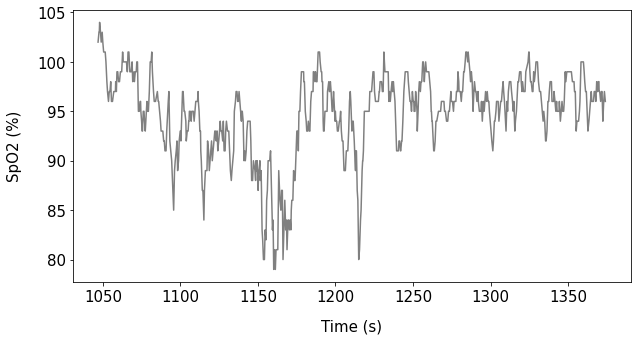

In [10]:
plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.plot(Clock_values, SpO2_values, color='gray')
plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('SpO2 (%)', labelpad=15)

<ErrorbarContainer object of 3 artists>

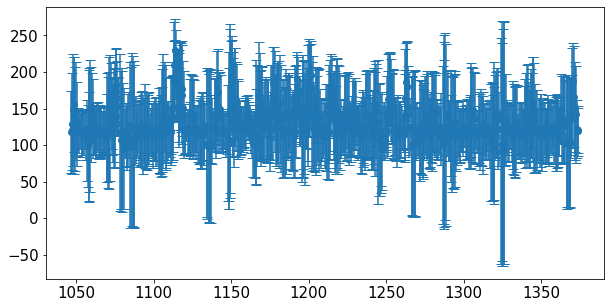

In [53]:
plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
plt.errorbar(Clock_values, heatbeat_values, yerr=SD_values, capsize=5, marker='o', linestyle='--')

Text(0, 0.5, 'Heart rate (per min)')

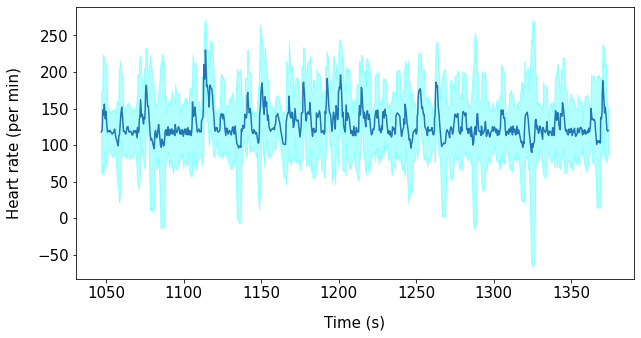

In [66]:
plt.figure(figsize=(10, 5))  
plt.rcParams["font.size"] = 15
#plt.plot(Clock_values, heatbeat_values, marker='o', linestyle='-', label='Data Points')
plt.plot(Clock_values, heatbeat_values, linestyle='-', label='Data Points')

plt.fill_between(Clock_values, np.subtract(heatbeat_values, SD_values), np.add(heatbeat_values, SD_values),
                 color='aqua', alpha=0.3, label='Standard Deviation')

plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('Heart rate (per min)', labelpad=15)

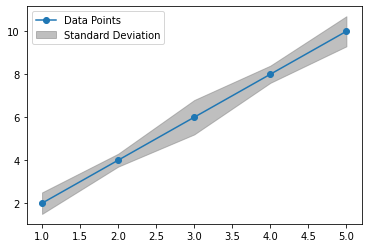

In [1]:
#ChatGPT

import numpy as np
import matplotlib.pyplot as plt

# サンプルデータ（仮想的なデータ）
x_values = [1, 2, 3, 4, 5]
y_values = [2, 4, 6, 8, 10]

# 標準偏差（仮想的なデータ）
std_deviation = [0.5, 0.3, 0.8, 0.4, 0.7]

# プロットする
plt.plot(x_values, y_values, marker='o', linestyle='-', label='Data Points')

# 帯状に標準偏差を表示
plt.fill_between(x_values, np.subtract(y_values, std_deviation), np.add(y_values, std_deviation),
                 color='gray', alpha=0.5, label='Standard Deviation')

# ラベルやタイトルの追加
# plt.xlabel('X軸')
# plt.ylabel('Y軸')
# plt.title('データのプロット（標準偏差を帯状に表示）')
plt.legend()

# プロットを表示
plt.show()

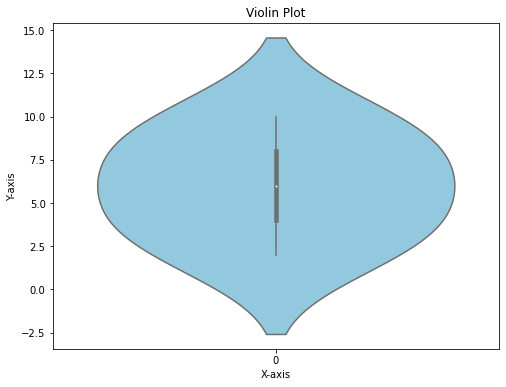

In [8]:
import seaborn as sns

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the violinplot
sns.violinplot(data=[y_values], ax=ax, color='skyblue')

# Set the labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Violin Plot')

# Show the plot
plt.show()


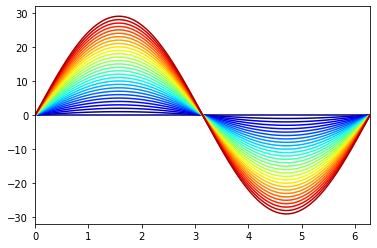

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
x =np.linspace(0,2*np.pi,100)
for i in range(30):   
    plt.plot(x,i*np.sin(x),color=cm.jet(i/30.0))
plt.xlim(0,2*np.pi)
plt.show()

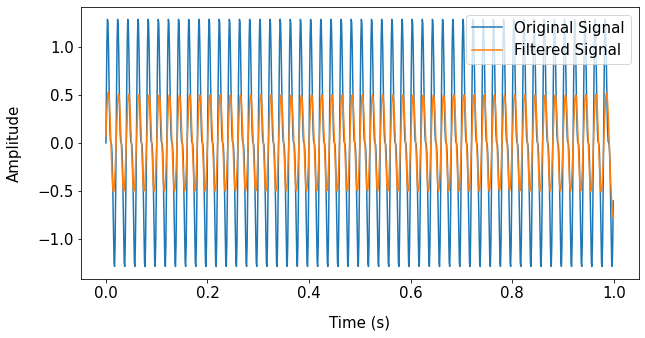

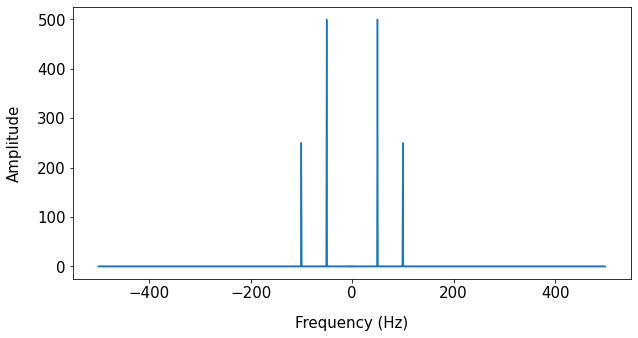

In [8]:
from scipy.signal import butter, filtfilt

def apply_lowpass_filter(signal, cutoff_freq, sampling_freq, order=5):
    # Calculate the normalized cutoff frequency
    nyquist_freq = 0.5 * sampling_freq
    normalized_cutoff_freq = cutoff_freq / nyquist_freq

    # Design the filter coefficients
    b, a = butter(order, normalized_cutoff_freq, btype='low', analog=False, output='ba')

    # Apply the filter to the signal
    filtered_signal = filtfilt(b, a, signal)

    return filtered_signal

# サンプリング周波数
sampling_freq = 1000

# カットオフ周波数
cutoff_freq = 50

# ノイズを含む信号
t = np.linspace(0, 1, sampling_freq, endpoint=False)
signal = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 100 * t)

# ローパスフィルタを適用
filtered_signal = apply_lowpass_filter(signal, cutoff_freq, sampling_freq)

# グラフを描画
plt.figure(figsize=(10, 5))
plt.rcParams["font.size"] = 15
plt.plot(t, signal, label='Original Signal')
plt.plot(t, filtered_signal, label='Filtered Signal')
plt.xlabel('Time (s)', labelpad=15)
plt.ylabel('Amplitude', labelpad=15)
plt.legend(loc='upper right')
plt.show()

# Perform FFT
fft = np.fft.fft(signal)

# Calculate the frequency axis
freq = np.fft.fftfreq(len(signal), 1/sampling_freq)

# Plot the frequency spectrum
plt.figure(figsize=(10, 5))
plt.rcParams["font.size"] = 15
plt.plot(freq, np.abs(fft))
plt.xlabel('Frequency (Hz)', labelpad=15)
plt.ylabel('Amplitude', labelpad=15)
plt.show()


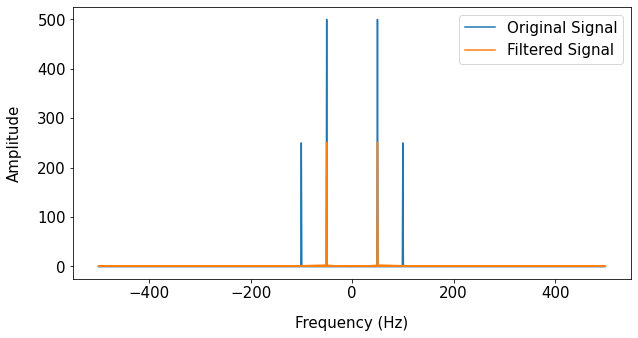

In [23]:
# Perform FFT on both original and filtered signals
fft_original = np.fft.fft(signal)
fft_filtered = np.fft.fft(filtered_signal)

# Calculate the frequency axis
freq = np.fft.fftfreq(len(signal), 1/sampling_freq)

# Plot the frequency spectrum of both signals on the same plot
plt.figure(figsize=(10, 5))
plt.rcParams["font.size"] = 15
plt.plot(freq, np.abs(fft_original), label='Original Signal')
plt.plot(freq, np.abs(fft_filtered), label='Filtered Signal')
plt.xlabel('Frequency (Hz)', labelpad=15)
plt.ylabel('Amplitude', labelpad=15)
plt.legend(loc='upper right')
plt.show()